In [51]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from scipy.sparse import csr_matrix


In [52]:
# Read edge data from file
# data
data = pd.read_csv("karate.dat", sep=' ')

# Number of vertices
n = max(data.max())


In [53]:
for _, row in data.iterrows():
    value1 = row.iloc[0]
    value2 = row.iloc[1]
    # Do something with the values
    print(value1, value2)


2 0
2 1
3 0
3 1
3 2
4 0
5 0
6 0
6 4
6 5
7 0
7 1
7 2
7 3
8 0
8 2
9 2
10 0
10 4
10 5
11 0
12 0
12 3
13 0
13 1
13 2
13 3
16 5
16 6
17 0
17 1
19 0
19 1
21 0
21 1
25 23
25 24
27 2
27 23
27 24
28 2
29 23
29 26
30 1
30 8
31 0
31 24
31 25
31 28
32 2
32 8
32 14
32 15
32 18
32 20
32 22
32 23
32 29
32 30
32 31
33 8
33 9
33 13
33 14
33 15
33 18
33 19
33 20
33 22
33 23
33 26
33 27
33 28
33 29
33 30
33 31
33 32


In [54]:
# Create adjacency list from the data
adj_list = {}
for _, row in data.iterrows():
    x, y = row.iloc[0], row.iloc[1]
    if x not in adj_list:
        adj_list[x] = set()
    if y not in adj_list:
        adj_list[y] = set()
    adj_list[x].add(y)
    adj_list[y].add(x)


In [55]:
def cut_size(n1, n2):
    """Calculate the cut size (number of edges between nodes in two groups).

    Parameters:
    n1 (set): First group of nodes.
    n2 (set): Second group of nodes.

    Returns:
    int: The cut size (number of edges between nodes in groups n1 and n2).
    """
    # Calculate cut size using adjacency list
    cut_size = sum(1 for node in n1 for neighbor in adj_list[node] if neighbor in n2)
    return cut_size

def best_swap(n1, n2):
    """Find the best swap between groups to minimize cut size.

    Parameters:
    n1 (set): First group of nodes.
    n2 (set): Second group of nodes.

    Returns:
    tuple: Minimum cut size and the corresponding partition.
    """
    best_cut_size = cut_size(n1, n2)
    best_partition = (n1, n2)
    best_change = 0

    # Check all possible swaps
    for node1 in n1:
        for node2 in n2:
            # Swap the nodes
            n1.remove(node1)
            n1.add(node2)
            n2.remove(node2)
            n2.add(node1)

            # Calculate new cut size
            new_cut_size = cut_size(n1, n2)
            change = best_cut_size - new_cut_size

            # Check if this swap is beneficial
            if change > best_change:
                best_cut_size = new_cut_size
                best_change = change
                best_partition = (n1.copy(), n2.copy())

            # Revert the swap
            n1.remove(node2)
            n1.add(node1)
            n2.remove(node1)
            n2.add(node2)

    return best_cut_size, best_partition

def kernighan_lin(n1, n2):
    """Perform Kernighan-Lin partitioning to minimize cut size.

    Parameters:
    n1 (set): First group of nodes.
    n2 (set): Second group of nodes.

    Returns:
    tuple: Final cut size and partition.
    """
    for _ in range(10):  # Number of iterations or until convergence
        cut_size, partition = best_swap(n1, n2)
        n1, n2 = partition
    return cut_size, partition


In [56]:

# Divide nodes into two random groups
nodes = list(range(1, n + 1))
random.shuffle(nodes)
cut = n // 2
n1 = set(nodes[:cut])
n2 = set(nodes[cut:])


In [57]:
n1

{1, 3, 4, 10, 12, 13, 14, 15, 17, 21, 22, 26, 29, 30, 32, 33}

In [58]:
n2

{2, 5, 6, 7, 8, 9, 11, 16, 18, 19, 20, 23, 24, 25, 27, 28, 31}

In [ ]:

# Perform Kernighan-Lin partitioning
cut_size, partition = kernighan_lin(n1, n2)
p1, p2 = sorted(partition[0]), sorted(partition[1])
print(f"Cut size: {cut_size}")
print(f"Partition 1: {p1}")
print(f"Partition 2: {p2}")

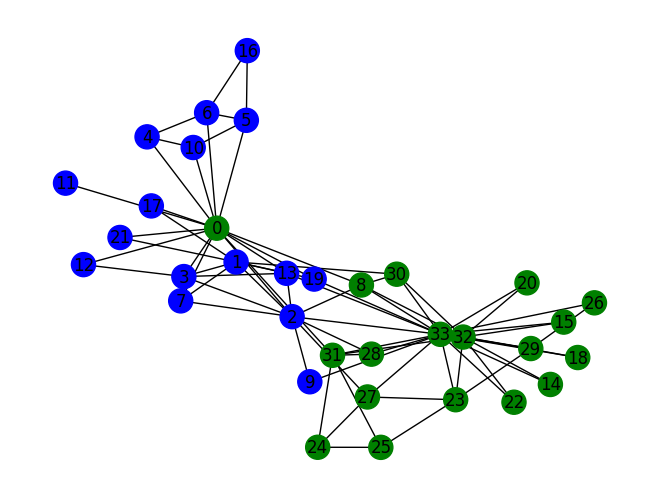

In [35]:
# Create a NetworkX graph
G = nx.Graph()
G.add_edges_from(data.values)

# Define colors based on partitions
colors = ['b' if node in p1 else 'g' for node in G.nodes()]

# Draw the graph with labels and colors
nx.draw(G, with_labels=True, node_color=colors)

In [59]:
# Load the dataset
data = np.load("/home/awachid/codes/google_dmon/graph_embedding/dmon/data/cora.npz")

adj_matrix = csr_matrix((data['adj_data'], data['adj_indices'], data['adj_indptr']), shape=data['adj_shape'])

# Create a NetworkX graph
G = nx.from_scipy_sparse_array(adj_matrix)

# Divide nodes into two random groups
nodes = list(G.nodes())
np.random.shuffle(nodes)
cut = len(nodes) // 2
n1 = set(nodes[:cut])
n2 = set(nodes[cut:])


In [60]:
# Perform Kernighan-Lin partitioning
cut_size, partition = kernighan_lin(n1, n2)
p1, p2 = sorted(partition[0]), sorted(partition[1])
print(f"Cut size: {cut_size}")
print(f"Partition 1: {p1}")
print(f"Partition 2: {p2}")


KeyError: 36